# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ripa Khodijah
- **Email:** m299d4kx1761@bangkit.academy
- **ID Dicoding:** m299d4kx1761

## Menentukan Pertanyaan Bisnis

- apakah terdapat korelasi antara musim dll, dengan perilku sewa?
- apakah kemelbaban (hum) juga mempengaruihi terhadap perilaku sewa?

## Import Semua Packages/Library yang Digunakan

In [178]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Data Wrangling

### Gathering Data

In [179]:
day_df = pd.read_csv("day.csv", delimiter=",")
hour_df = pd.read_csv("hour.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [180]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [181]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [182]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [186]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [187]:
day_df.dropna(thresh=int(day_df.shape[1]*0.75), inplace=True)
hour_df.dropna(thresh=int(hour_df.shape[1]*0.75), inplace=True)

In [188]:
cols_to_keep = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df = day_df.dropna(subset=cols_to_keep)
hour_df = hour_df.dropna(subset=cols_to_keep)

In [189]:
day_df['mnth'] = day_df['mnth'].astype(int)
day_df['holiday'] = day_df['holiday'].astype(int)
day_df['weekday'] = day_df['weekday'].astype(int)
day_df['workingday'] = day_df['workingday'].astype(int)
day_df['weathersit'] = day_df['weathersit'].astype(int)

hour_df['holiday'] = hour_df['holiday'].astype(int)
hour_df['weekday'] = hour_df['weekday'].astype(int)
hour_df['workingday'] = hour_df['workingday'].astype(int)
hour_df['weathersit'] = hour_df['weathersit'].astype(int)

In [190]:
day_df = day_df[(np.abs(day_df['cnt']) <= (3 * day_df['cnt'].std()))]

In [191]:
scaler = StandardScaler()
day_df[num_cols] = scaler.fit_transform(day_df[num_cols])
hour_df[num_cols] = scaler.fit_transform(hour_df[num_cols])

In [192]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     537 non-null    int64  
 1   dteday      537 non-null    object 
 2   season      537 non-null    int64  
 3   yr          537 non-null    int64  
 4   mnth        537 non-null    int64  
 5   holiday     537 non-null    int64  
 6   weekday     537 non-null    int64  
 7   workingday  537 non-null    int64  
 8   weathersit  537 non-null    int64  
 9   temp        537 non-null    float64
 10  atemp       537 non-null    float64
 11  hum         537 non-null    float64
 12  windspeed   537 non-null    float64
 13  casual      537 non-null    int64  
 14  registered  537 non-null    int64  
 15  cnt         537 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 71.3+ KB
None


## Exploratory Data Analysis (EDA)

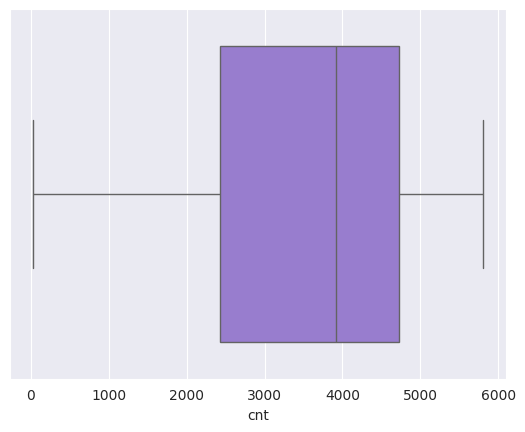

In [193]:
sns.boxplot(x='cnt', data= day_df, color='mediumpurple')
plt.show()

<ipython-input-194-12d6aea0014e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_df['cnt'], bins=50,color ='green')


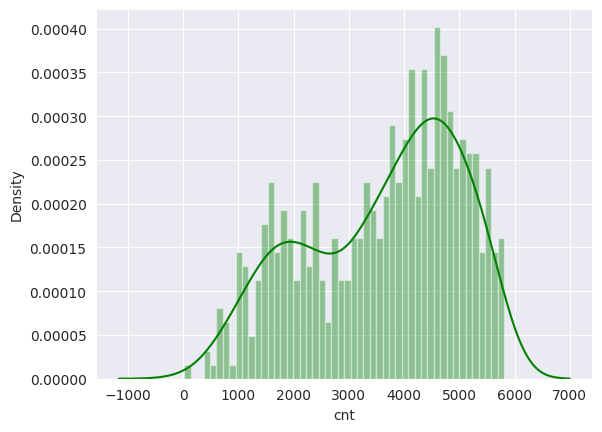

In [194]:
sns.set_style('darkgrid')
sns.distplot(day_df['cnt'], bins=50,color ='green')
plt.show()

['temp', 'atemp', 'hum', 'windspeed']


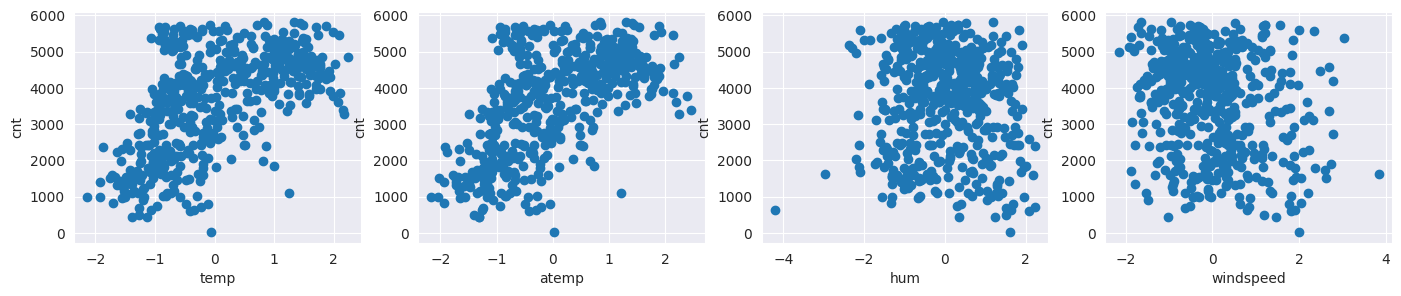

In [195]:
fields=[f for f in day_df]
fields=fields[9:-3]
print (fields)

fig=plt.figure(figsize=(17,3))
for i,f in enumerate(fields):
  ax=fig.add_subplot(1,4,i+1)
  ax.scatter(day_df[f],day_df['cnt'])
  ax.set_ylabel('cnt')
  ax.set_xlabel(f)
plt.show()

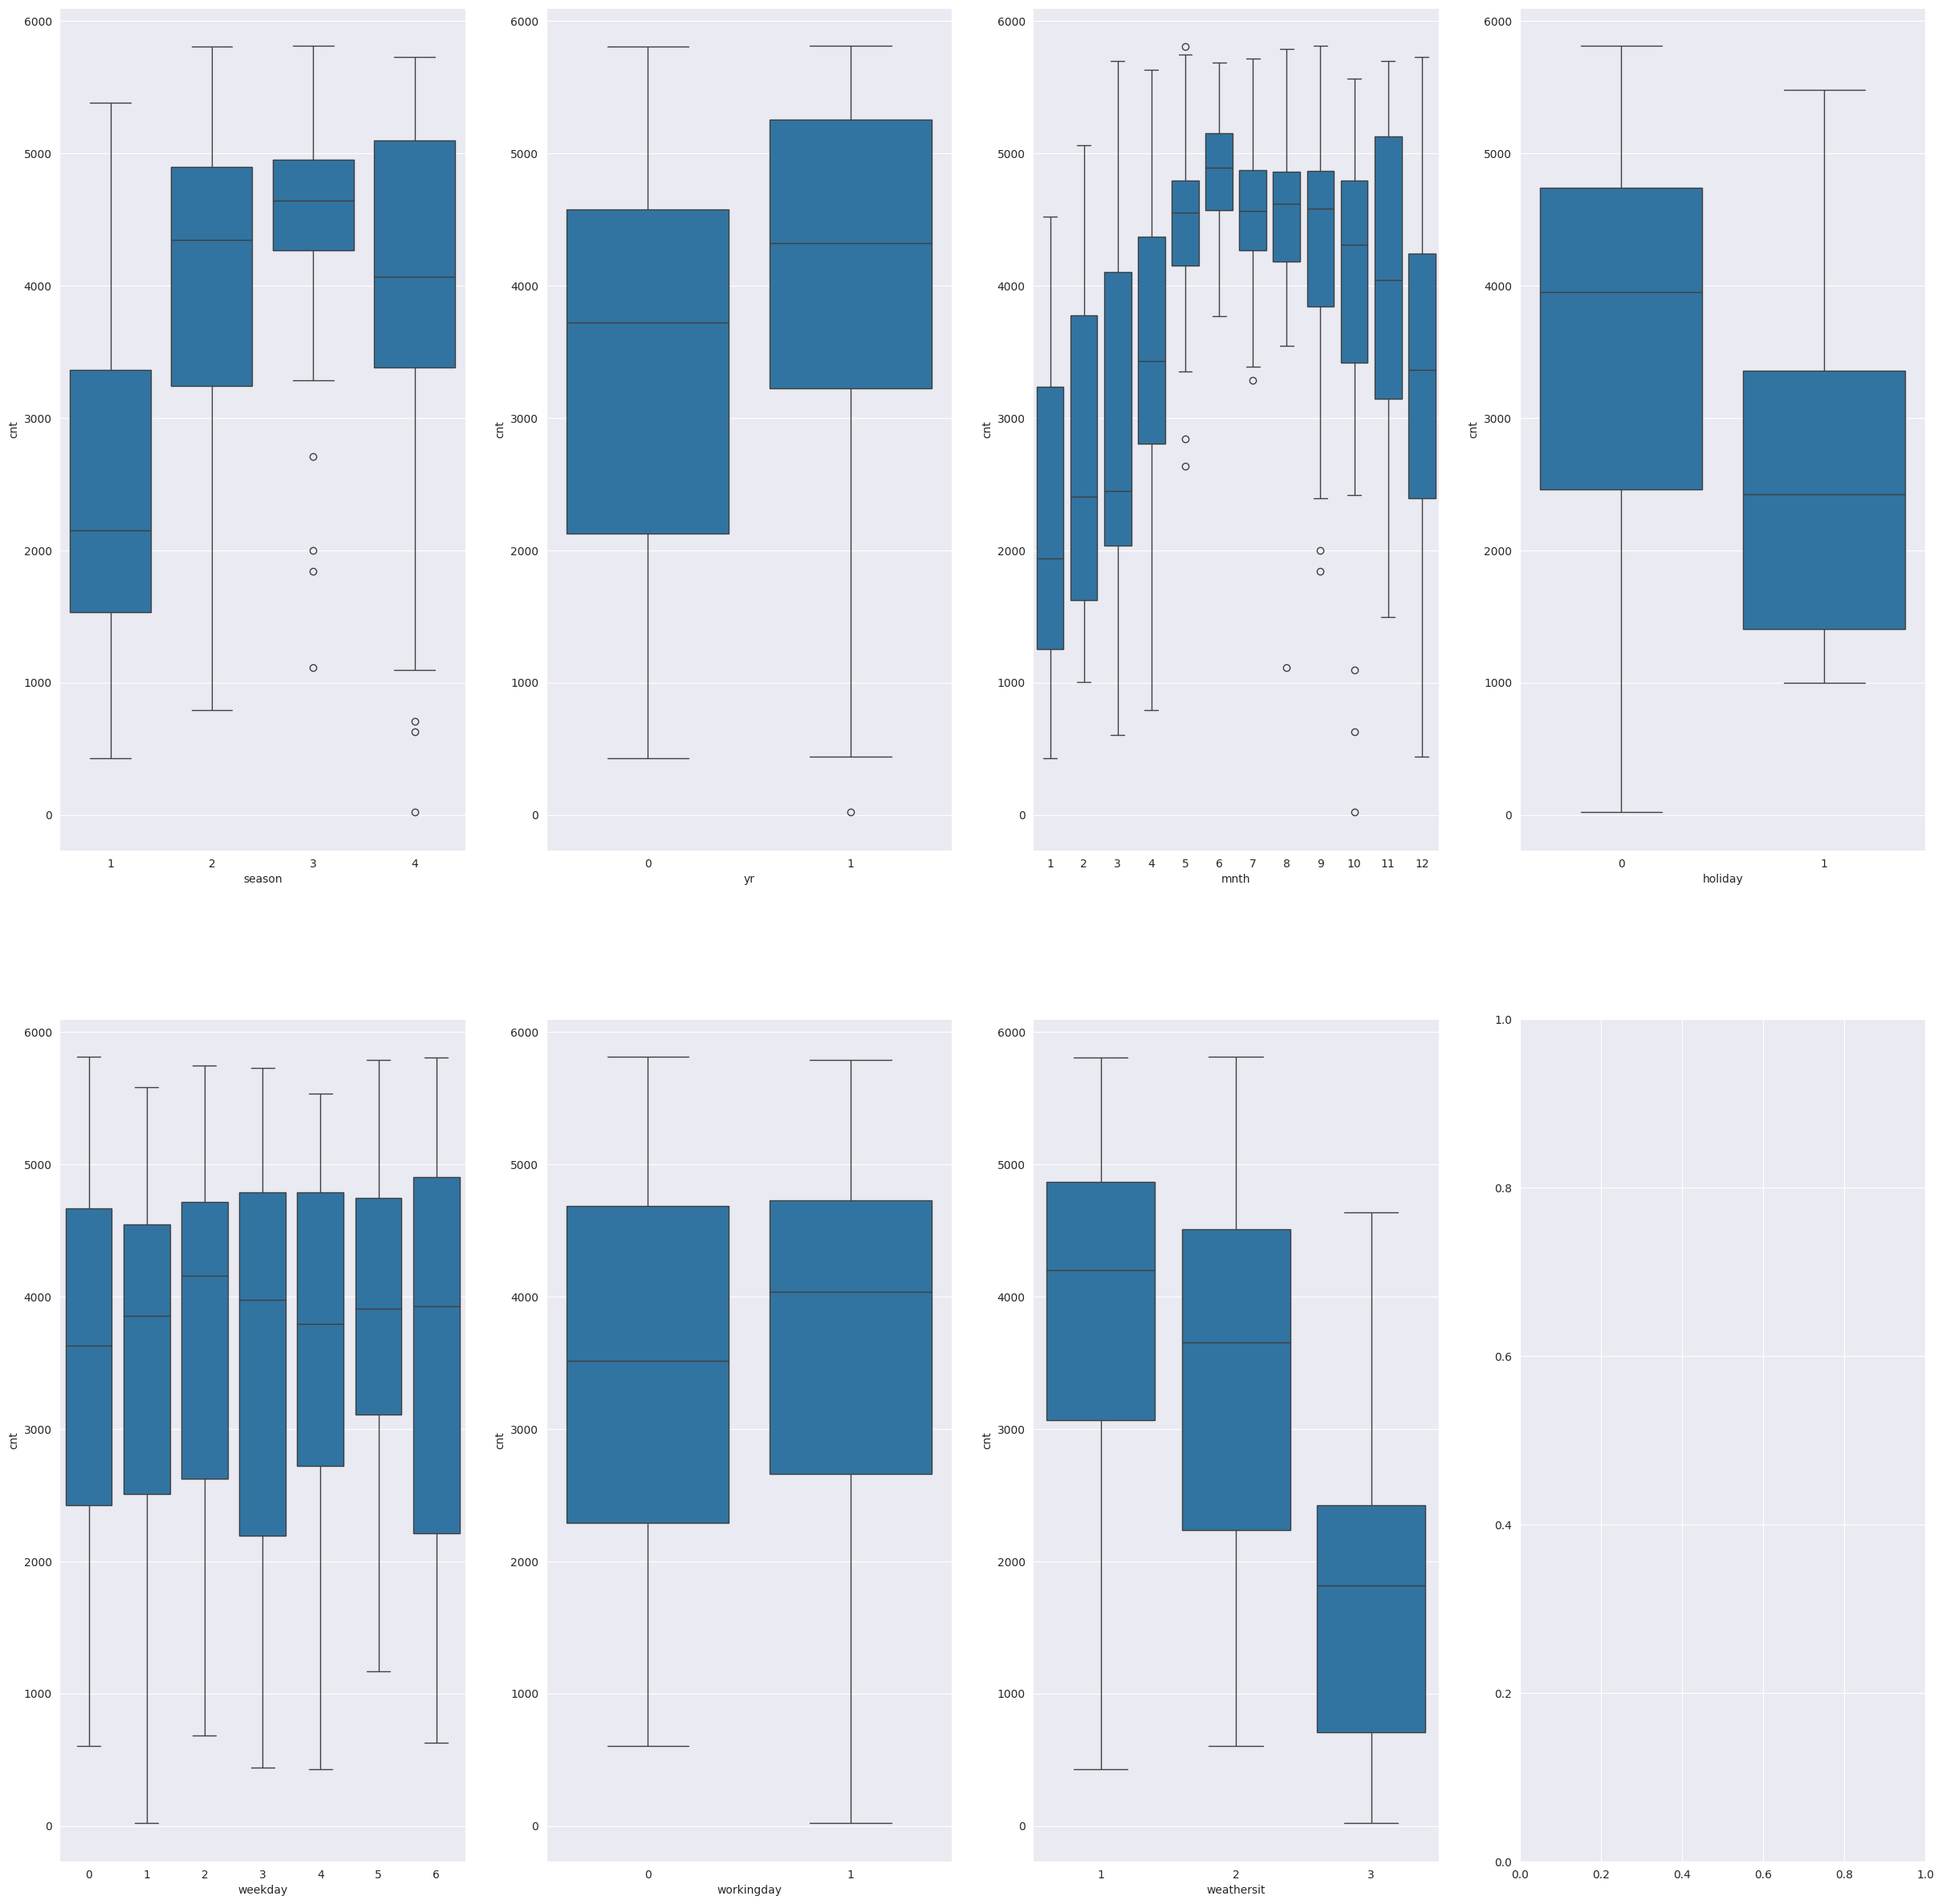

In [196]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 30))

sns.boxplot(data=day_df, y='cnt', x='season', ax=axes[0, 0])
sns.boxplot(data=day_df, y='cnt', x='yr', ax=axes[0, 1])
sns.boxplot(data=day_df, y='cnt', x='mnth', ax=axes[0, 2])
sns.boxplot(data=day_df, y='cnt', x='holiday', ax=axes[0, 3])
sns.boxplot(data=day_df, y='cnt', x='weekday', ax=axes[1, 0])
sns.boxplot(data=day_df, y='cnt', x='workingday', ax=axes[1, 1])
sns.boxplot(data=day_df, y='cnt', x='weathersit', ax=axes[1, 2])

axes[0, 0].set(xlabel='season', ylabel='cnt')
axes[0, 1].set(xlabel='yr', ylabel='cnt')
axes[0, 2].set(xlabel='mnth', ylabel='cnt')
axes[0, 3].set(xlabel='holiday', ylabel='cnt')


plt.show()

<ipython-input-197-fb9d6deece89>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_df.corr(method='pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax)


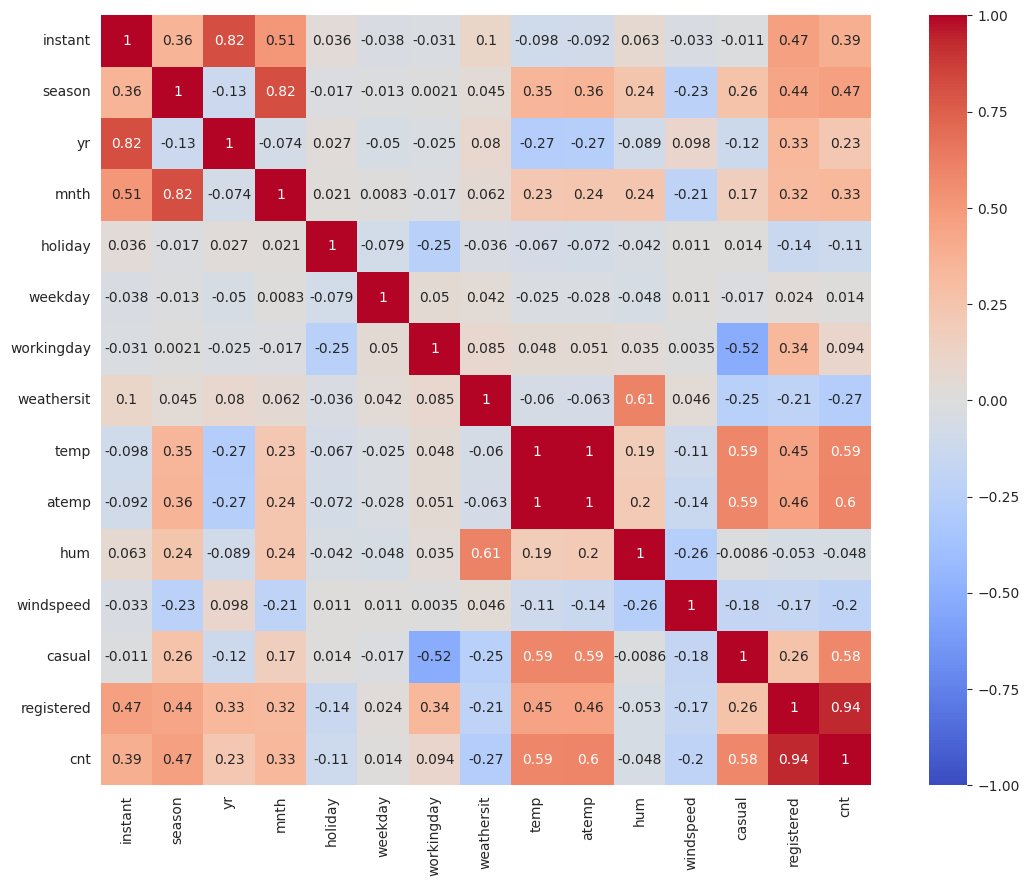

In [197]:
fig, ax = plt.subplots(figsize=(15, 10))  # Increase figure size here

sns.heatmap(day_df.corr(method='pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax)

plt.show()

### Explore ...

## Visualization & Explanatory Analysis

In [198]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], dayfirst=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,-0.581617,-0.434716,1.133450,-0.456133,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,-0.476418,-0.494833,0.405061,0.634835,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,-1.386791,-1.494150,-1.312697,0.631986,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,-1.366984,-1.356008,-0.296155,-0.457991,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,-1.220132,-1.251731,-1.314795,-0.128519,82,1518,1600


In [199]:
def split_dteday(df):
  df['year'] = df['dteday'].dt.year
  df['mnth'] = df['dteday'].dt.month
  df['day'] = df['dteday'].dt.day
  df['dayofweek'] = df['dteday'].dt.dayofweek
  df['hour'] = df['dteday'].dt.hour
  df = df.drop('dteday', axis=1)
  return(df)

In [200]:
day_df = split_dteday(day_df)
hour_df = split_dteday(hour_df)
day_df = day_df.drop(['casual', 'registered'], axis=1)
day_df.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,dayofweek,hour
0,1,1,0,1,0,6,0,2,-0.581617,-0.434716,1.133450,-0.456133,985,2011,1,5,0
1,2,1,0,1,0,0,0,2,-0.476418,-0.494833,0.405061,0.634835,801,2011,2,6,0
2,3,1,0,1,0,1,1,1,-1.386791,-1.494150,-1.312697,0.631986,1349,2011,3,0,0
3,4,1,0,1,0,2,1,1,-1.366984,-1.356008,-0.296155,-0.457991,1562,2011,4,1,0
4,5,1,0,1,0,3,1,1,-1.220132,-1.251731,-1.314795,-0.128519,1600,2011,5,2,0


In [201]:
day_df = day_df[np.abs(day_df['cnt']) <= (3 * day_df['cnt'].std())]


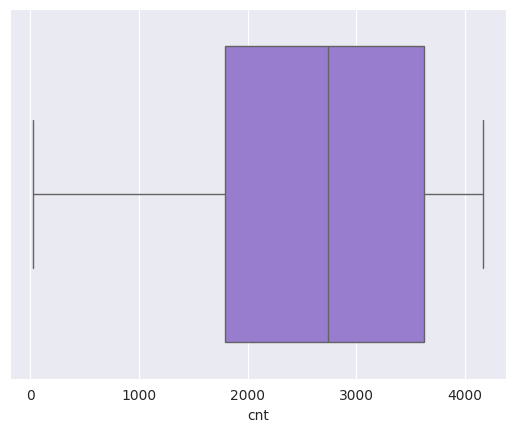

In [202]:
sns.boxplot(x="cnt", data=day_df, color="mediumpurple")
plt.show()

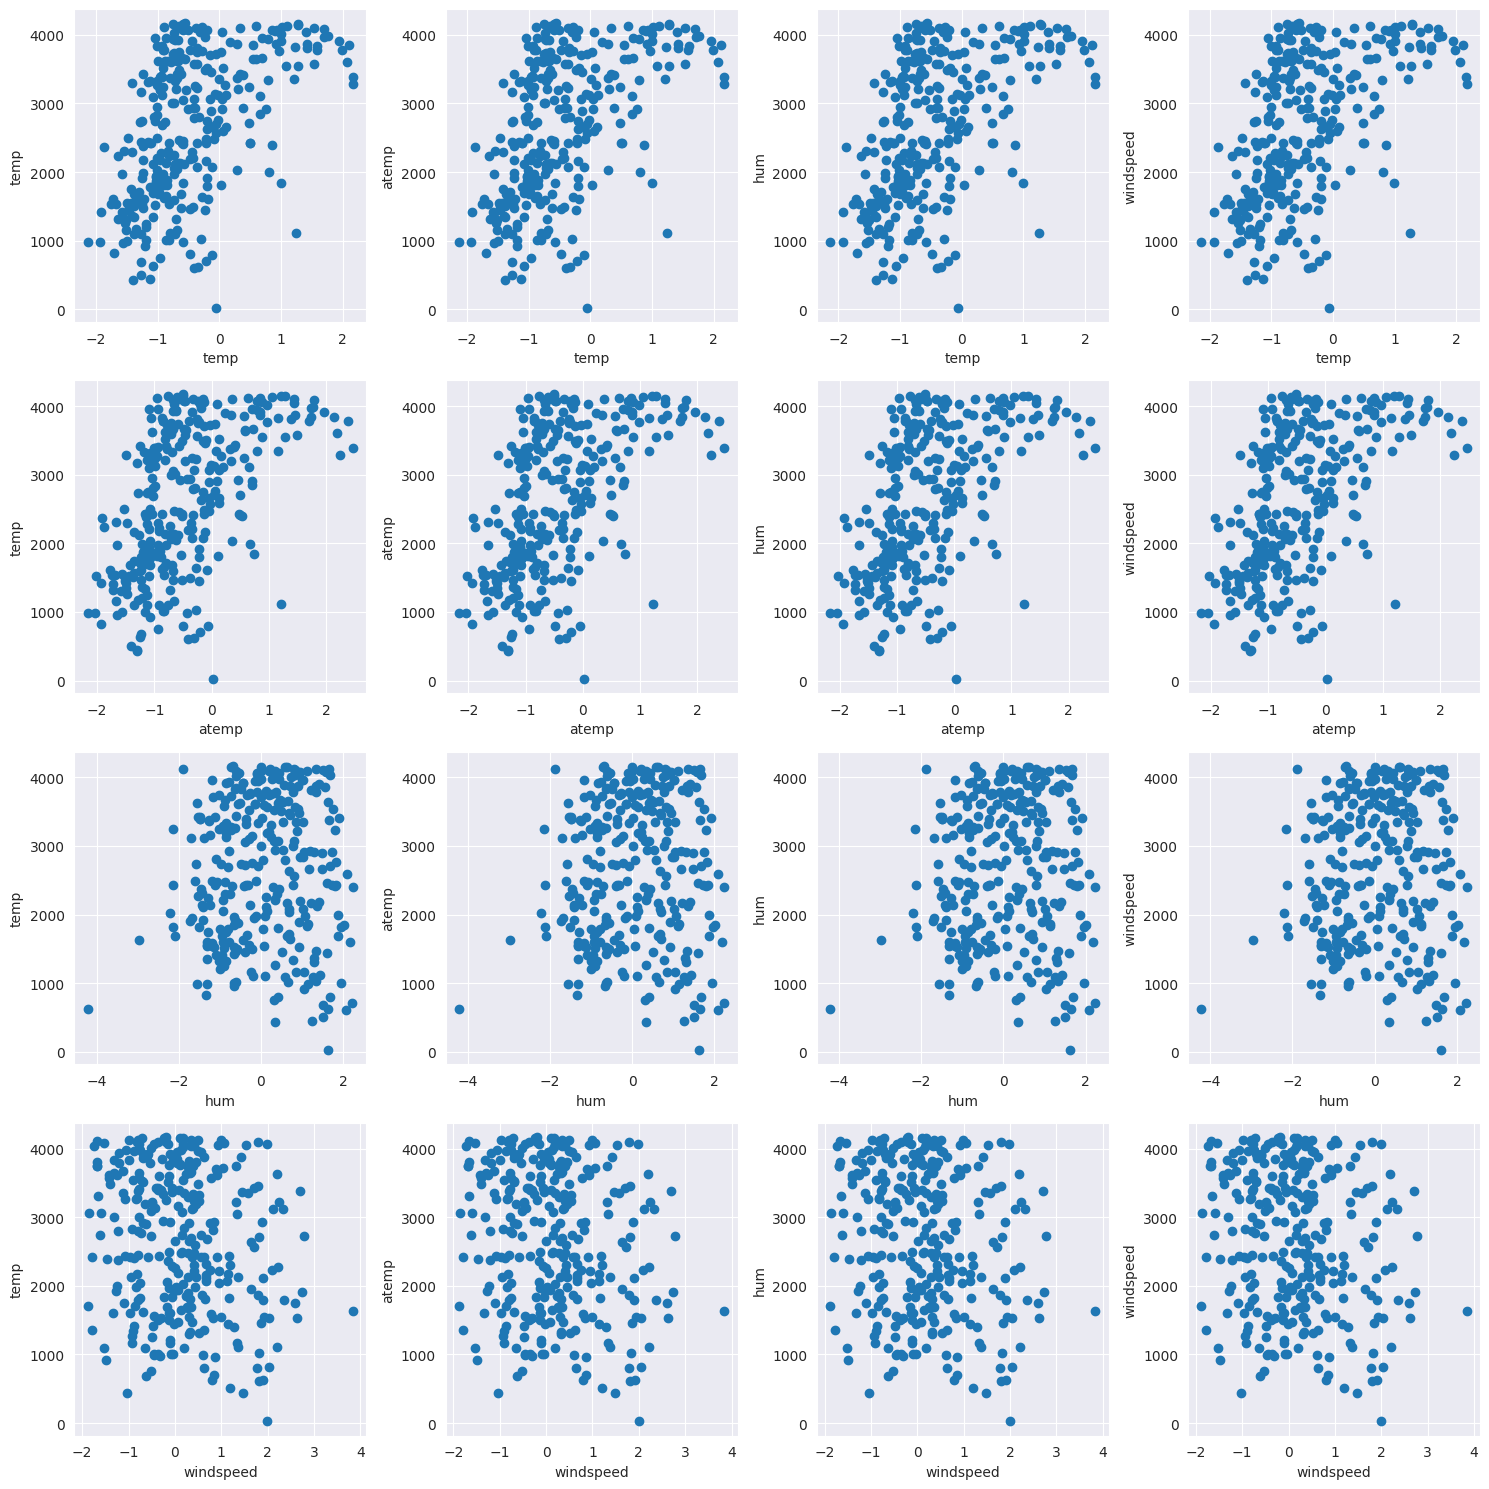

In [203]:
fig, axes = plt.subplots(len(fields), len(fields), figsize=(15, 15))

for i, f1 in enumerate(fields):
    for j, f2 in enumerate(fields):
        idx = i * len(fields) + j + 1

        axes[i, j].scatter(day_df[f1], day_df['cnt'])
        axes[i, j].set_ylabel(f2)
        axes[i, j].set_xlabel(f1)

plt.tight_layout()
plt.show()

In [204]:
drop_idx=day_df[(day_df['atemp']>20)&(day_df['atemp']<40)&(day_df['atemp']>10)&(day_df['atemp']<20)].index

In [205]:
from sklearn.preprocessing import MinMaxScaler
def scalling(df):
  scaler = MinMaxScaler()
  num_cols = ['temp', 'atemp', 'hum', 'windspeed']
  df[num_cols] = scaler.fit_transform(df[num_cols])
  return df

In [206]:
day_df=scalling(day_df)
hour_df=scalling(hour_df)
day_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,dayofweek,hour
0,1,1,0,1,0,6,0,2,0.360789,0.373517,0.828620,0.248970,985,2011,1,5,0
1,2,1,0,1,0,0,0,2,0.385232,0.360541,0.715771,0.439625,801,2011,2,6,0
2,3,1,0,1,0,1,1,1,0.173705,0.144830,0.449638,0.439127,1349,2011,3,0,0
3,4,1,0,1,0,2,1,1,0.178308,0.174649,0.607131,0.248645,1562,2011,4,1,0
4,5,1,0,1,0,3,1,1,0.212429,0.197158,0.449313,0.306223,1600,2011,5,2,0


In [207]:
from sklearn.model_selection import train_test_split

x_day_df, x_hour_df, y_day_df, y_hour_df = train_test_split(day_df.drop(['cnt'], axis=1), day_df['cnt'], test_size=0.3)


In [208]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [209]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [210]:
def evaluate(reg_cls, params=None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(x_day_df, y_day_df)
    pred = reg.predict(x_hour_df)

    y_hour_df_exp = np.expm1(y_hour_df)
    pred_exp = np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_hour_df_exp, pred_exp))

    return reg, pred_exp

In [211]:
lr_reg, pred_lr = evaluate(LinearRegression)
rg_reg, pred_rg = evaluate(Ridge)
ls_reg, pred_ls = evaluate(Lasso)
rf_reg, pred_rf = evaluate(RandomForestRegressor)
gb_reg, pred_gb = evaluate(HistGradientBoostingRegressor)
xg_reg, pred_xg = evaluate(XGBRegressor)
lg_reg, pred_lg = evaluate(LGBMRegressor)

params = {'n_estimators': [100*i for i in range(1, 6)]}
xg_reg, pred_xg = evaluate(XGBRegressor, params)
lg_reg, pred_lg = evaluate(LGBMRegressor, params)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)



 <class 'sklearn.linear_model._base.LinearRegression'>
inf

 <class 'sklearn.linear_model._ridge.Ridge'>
inf

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
inf


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)



 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
inf


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)



 <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor'>
inf

 <class 'xgboost.sklearn.XGBRegressor'>
inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 14
[LightGBM] [Info] Start training from score 2671.472222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-210-d6a84ccee2c4>:9: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)


In [212]:
def feature_importance(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df = pd.DataFrame(sorted(zip(x_day_df.columns, reg.feature_importances_)), columns=['features', 'value'])
    sns.barplot(x='value', y='features', data=df.sort_values(by='value', ascending=False))
    plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


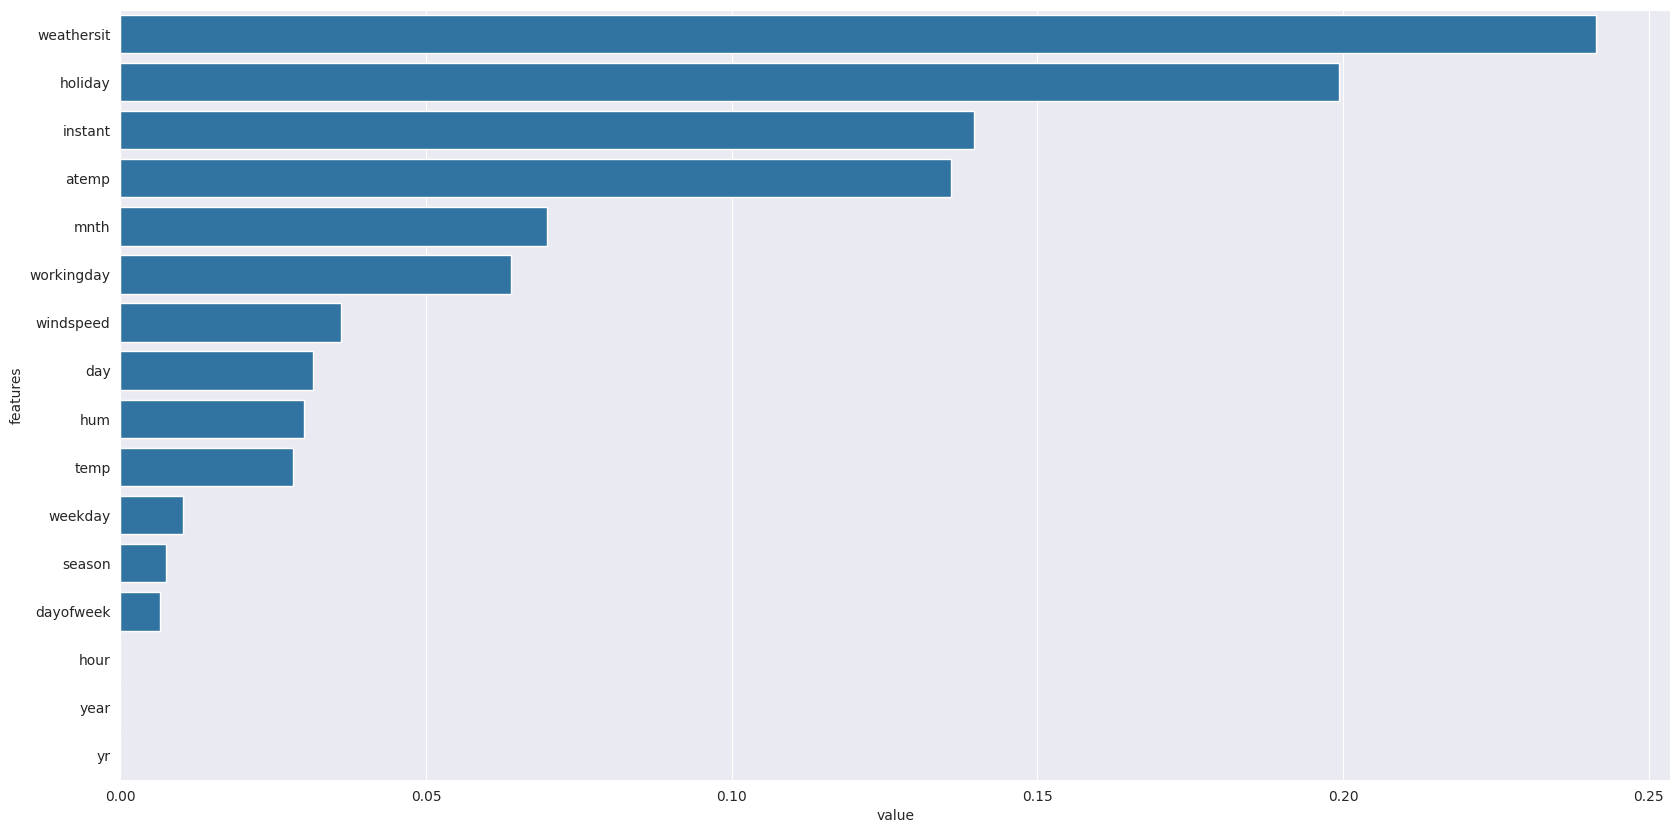

In [213]:
feature_importance(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


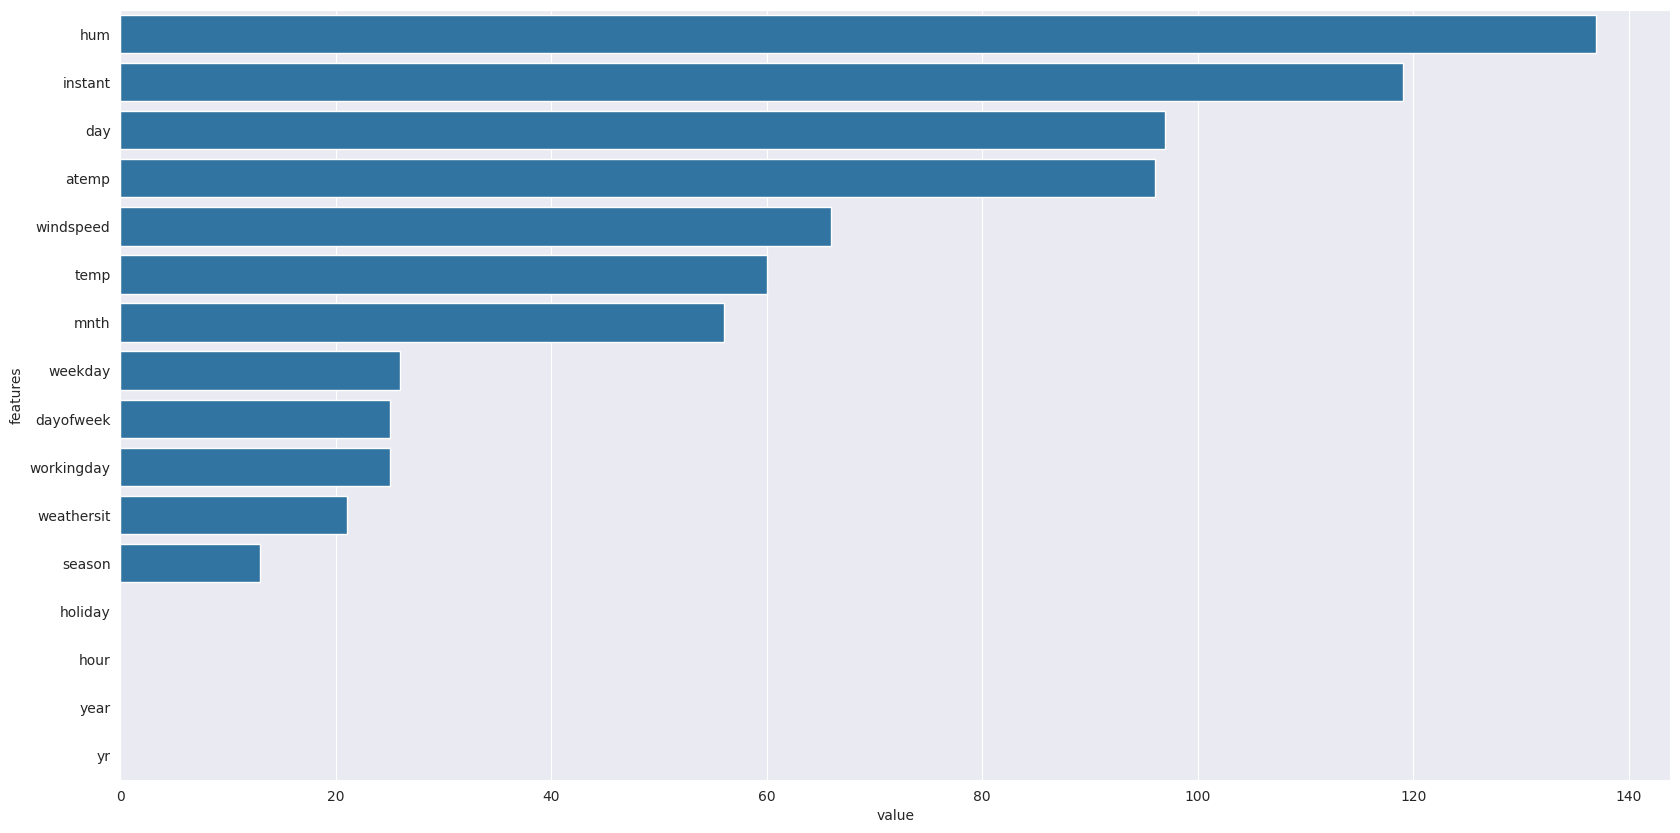

In [214]:
feature_importance(lg_reg)

### Pertanyaan 1:

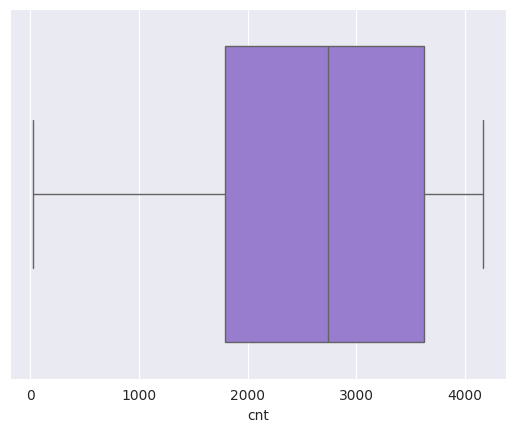

In [215]:
sns.boxplot(x="cnt", data=day_df, color="mediumpurple")
plt.show()

### Pertanyaan 2:

<class 'lightgbm.sklearn.LGBMRegressor'>


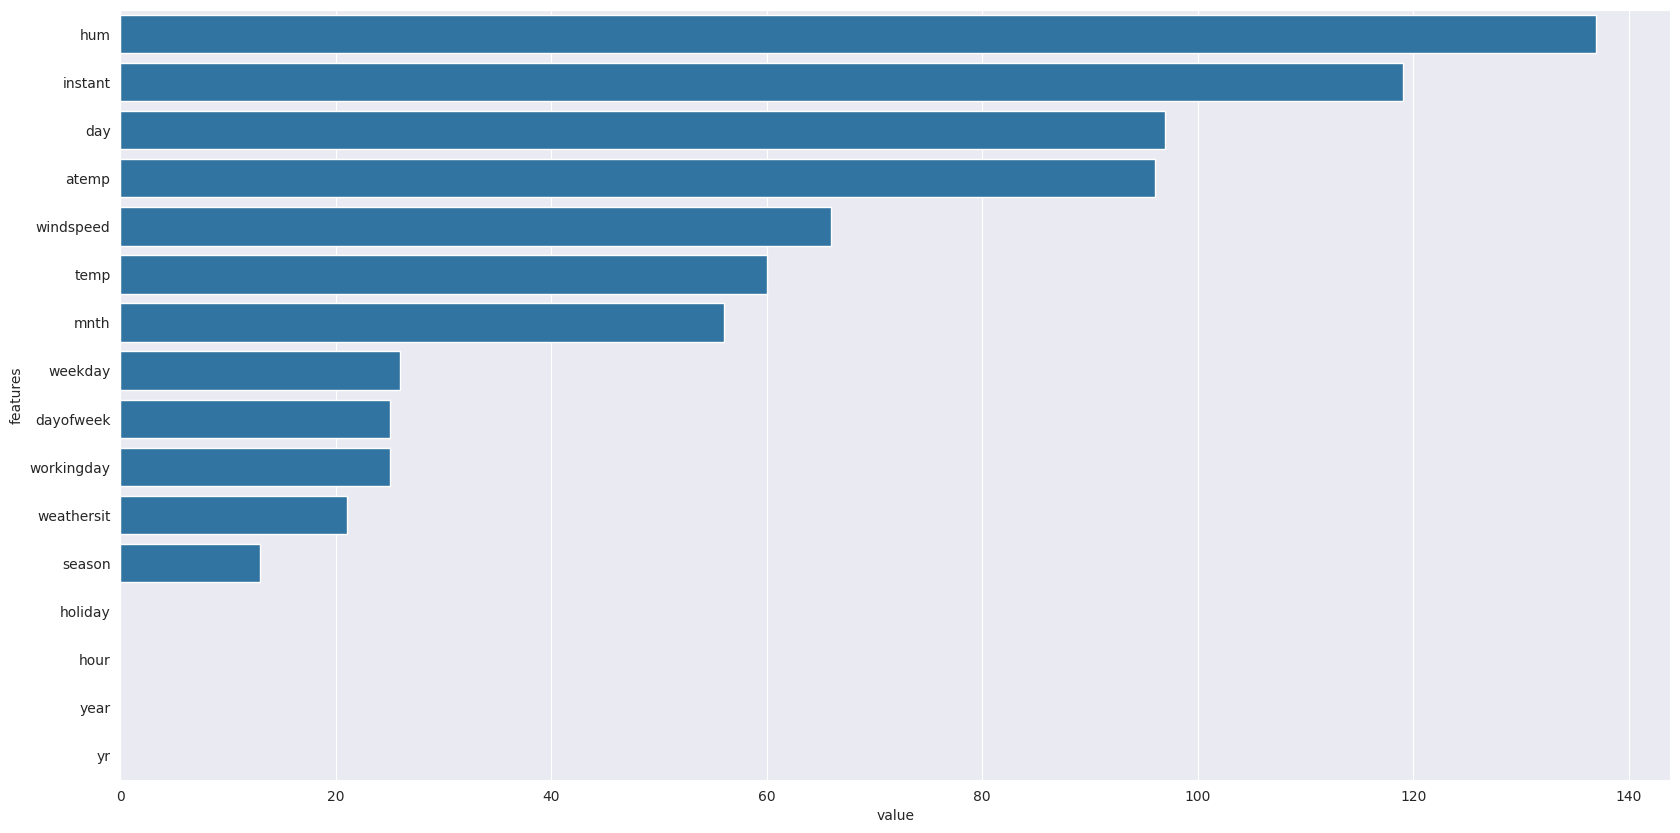

In [216]:
feature_importance(lg_reg)

## Conclusion

- Terdapat korelasi antara musim (season) dengan perilaku sewa. Ini dapat dilihat pada grafik boxplot yang menunjukkan variasi nilai kolom 'cnt' (yang mungkin merupakan kolom yang menyatakan jumlah sewa) dalam setiap musim.
- Terdapat juga korelasi antara kelembaban (hum) dengan perilaku sewa. Hal ini dapat dilihat pada hasil feature importance dari penggunaan XGBoost dan LightGBM, dimana kolom 'hum' memiliki nilai yang tinggi di antara feature-feature lainnya.

In [218]:
day_df.to_csv("Data_Hasil_Analisis.csv", index=False)